Link github repo: https://github.com/NibuTake/PyDEA

Link documentazione: https://nibutake.github.io/PyDEA/index.html

In [ ]:
!pip install Pyfrontier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 27.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from Pyfrontier.frontier_model import EnvelopDEA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_DS_B_C_ER_stata.csv to Dataset_DS_B_C_ER_stata.csv


In [ ]:
# Supponiamo che il file caricato si chiami 'Dataset.csv'
df = pd.read_csv('Dataset.csv')
# Impostiamo la colonna 'dmu' come indice
df.set_index('dmu', inplace=True)
# Sostituire tutti i valori negativi nella colonna 'o_rendimentoatteso' con 0
df['o_rendimentoatteso'] = df['o_rendimentoatteso'].apply(lambda x: 0.0001 if x < 0 else x)

df

,i_deviazionestandard,i_beta,i_commissionedingresso,o_rendimentoatteso
dmu,,,,
AcomeA_PMITALIA_ESG_A1,0.009,0.48,0.04,0.0370
Acomea_Pmitalia_Esg_P2,0.021,0.51,0.00,0.0410
Allianz_Azioni_Italia_All_Stars_A,0.010,0.62,0.02,0.0470
Albemarle_Target_Italy_A,0.011,0.58,0.05,0.0370
Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,0.010,0.72,0.03,0.0320
Amundi_Impegno_Italia_B,0.010,0.59,0.03,0.0380
Amundi_Sviluppo_Attivo_Italia_A,0.011,0.62,0.02,0.0400
Anima_Iniziativa_Italia_A,0.010,0.57,0.04,0.0520
Anima_Italia_A,0.010,0.60,0.04,0.0540


In [ ]:
# Modello DEA
dea = EnvelopDEA("CRS", "in")

# Esegui il fit con il dataset
dea.fit(
    df[["i_deviazionestandard", "i_beta"]].to_numpy(),  # Inputs: day, cost, area
    df[["o_rendimentoatteso"]].to_numpy()  # Output: profit
)

In [ ]:
# Creazione di una lista di dizionari per ogni DMU
results = []

# Itera su tutti i risultati delle DMU
for i, result in enumerate(dea.result):
    # Salva i risultati di ciascuna DMU in un dizionario
    dmu_result = {
        "Punteggio di efficienza": result.score,  # Punteggio di efficienza
        "Efficienza": "Efficiente" if result.is_efficient else "Non efficiente",  # Stato di efficienza
        "Ha slack": "Sì" if result.has_slack else "No",  # Se ha slack
        "Slack input 1": result.x_slack[0] if len(result.x_slack) > 0 else None,  # Slack sugli input (1°)
        "Slack input 2": result.x_slack[1] if len(result.x_slack) > 1 else None,  # Slack sugli input (2°)
        "Slack output 1": result.y_slack[0] if len(result.y_slack) > 0 else None,  # Slack sugli output (1°)
    }
    results.append(dmu_result)

# Creazione del DataFrame a partire dalla lista di dizionari
results_df = pd.DataFrame(results)


# Imposta l'indice del DataFrame come i nomi delle DMU (assumendo che i nomi delle DMU siano nell'indice di df)
results_df.index = df.index

results_df

,Punteggio di efficienza,Efficienza,Ha slack,Slack input 1,Slack input 2,Slack output 1
dmu,,,,,,
AcomeA_PMITALIA_ESG_A1,0.796651,Non efficiente,No,0.000328,-0.006555,0.000000
Acomea_Pmitalia_Esg_P2,0.803922,Non efficiente,No,0.009409,-0.023158,0.000000
Allianz_Azioni_Italia_All_Stars_A,0.824561,Non efficiente,Sì,0.000000,0.008245,0.000000
Albemarle_Target_Italy_A,0.657237,Non efficiente,No,0.000388,-0.007750,0.000000
Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,0.561404,Non efficiente,Sì,-0.000439,0.070527,0.000000
Amundi_Impegno_Italia_B,0.683544,Non efficiente,Sì,-0.000165,0.003291,0.000000
Amundi_Sviluppo_Attivo_Italia_A,0.676692,Non efficiente,No,0.000128,-0.002556,0.000000
Anima_Iniziativa_Italia_A,0.959672,Non efficiente,No,0.000386,-0.007724,0.000000
Anima_Italia_A,0.959211,Non efficiente,No,0.000066,-0.001316,0.000000


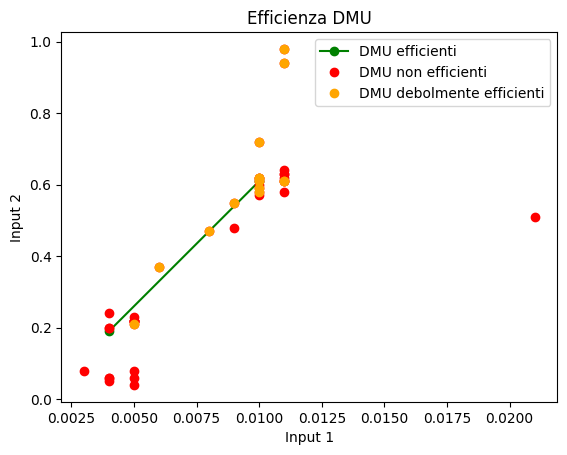

In [ ]:
# Visualizzazione con 2 input, 2D

eff_dmu = [r.dmu for r in dea.result if r.is_efficient]
ineff_dmu = [r.dmu for r in dea.result if r.is_efficient != 1]
weak_eff_dmu = [r.dmu for r in dea.result if r.has_slack]

plt.figure()
plt.plot(
    [d.input[0] for d in eff_dmu],
    [d.input[1] for d in eff_dmu],
    "-o",
    color="green",
    label="DMU efficienti",
)
plt.plot(
    [d.input[0] for d in ineff_dmu],
    [d.input[1] for d in ineff_dmu],
    "o",
    color="red",
    label="DMU non efficienti",
)
plt.plot(
    [d.input[0] for d in weak_eff_dmu],
    [d.input[1] for d in weak_eff_dmu],
    "o",
    color="orange",
    label="DMU debolmente efficienti",
)
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Efficienza DMU")
plt.legend()
plt.show()

In [ ]:
# Creazione di un dataframe vuoto per le combinazioni efficienti
df_dmu_comb_eff = pd.DataFrame(columns=[f"{df.index[i]}" for i in range(len(dea.result))])

# Itera su tutti i risultati delle DMU
for i, result in enumerate(dea.result):
    # Estrarre i pesi lambda
    lambda_weights = result.weights

    # Crea un dizionario per memorizzare i pesi di ciascuna DMU
    dmu_weights = {f"{j}": (lambda_weights[j] if lambda_weights[j] > 0 else 0) for j in range(len(lambda_weights))}

    # Aggiungi i pesi nel dataframe
    df_dmu_comb_eff.loc[i] = list(dmu_weights.values())

# Imposta i nomi delle DMU come indice del dataframe
df_dmu_comb_eff.index = df.index

#df_dmu_comb_eff.sum(axis=1)
df_dmu_comb_eff

,AcomeA_PMITALIA_ESG_A1,Acomea_Pmitalia_Esg_P2,Allianz_Azioni_Italia_All_Stars_A,Albemarle_Target_Italy_A,Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,Amundi_Impegno_Italia_B,Amundi_Sviluppo_Attivo_Italia_A,Anima_Iniziativa_Italia_A,Anima_Italia_A,Arca_Azioni_Italia_P,...,Arca_Economia_Reale_Bilanciato_Italia_55_Pir,Azimut_Dinamico,Bancoposta_Rinascimento_A,Carmignac_Portfolio_Patrimoine_Europe_A_Eur_Acc,Epsilon_Dlongrun,Eurizon_Am_Sicav_Low_Carbon_Euro_R_Cap,Eurizon_Bilanciato_Euro_Multimanager,Fideuram_Bilanciato,Ubs_lux_Key_Selection_Sicav_European_Growth_And_Income_eur_P_acc,Fidelity_Funds_European_Multi_Asset_Income_Fund_A_acc_eur
dmu,,,,,,,,,,,,,,,,,,,,,
AcomeA_PMITALIA_ESG_A1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.017943,0.0,0.0
Acomea_Pmitalia_Esg_P2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.157895,0.0,0.0
Allianz_Azioni_Italia_All_Stars_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Albemarle_Target_Italy_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.107566,0.0,0.0
Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Amundi_Impegno_Italia_B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253165,0.0,0.0
Amundi_Sviluppo_Attivo_Italia_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.639098,0.0,0.0
Anima_Iniziativa_Italia_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710868,0.0,0.0
Anima_Italia_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177632,0.0,0.0


In [ ]:
# Normalizzazione delle righe: ogni valore diviso per la somma della riga
df_normalized_comb_eff = df_dmu_comb_eff.div(df_dmu_comb_eff.sum(axis=1), axis=0)

df_normalized_comb_eff.index = df.index

df_normalized_comb_eff

,AcomeA_PMITALIA_ESG_A1,Acomea_Pmitalia_Esg_P2,Allianz_Azioni_Italia_All_Stars_A,Albemarle_Target_Italy_A,Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,Amundi_Impegno_Italia_B,Amundi_Sviluppo_Attivo_Italia_A,Anima_Iniziativa_Italia_A,Anima_Italia_A,Arca_Azioni_Italia_P,...,Arca_Economia_Reale_Bilanciato_Italia_55_Pir,Azimut_Dinamico,Bancoposta_Rinascimento_A,Carmignac_Portfolio_Patrimoine_Europe_A_Eur_Acc,Epsilon_Dlongrun,Eurizon_Am_Sicav_Low_Carbon_Euro_R_Cap,Eurizon_Bilanciato_Euro_Multimanager,Fideuram_Bilanciato,Ubs_lux_Key_Selection_Sicav_European_Growth_And_Income_eur_P_acc,Fidelity_Funds_European_Multi_Asset_Income_Fund_A_acc_eur
dmu,,,,,,,,,,,,,,,,,,,,,
AcomeA_PMITALIA_ESG_A1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.0
Acomea_Pmitalia_Esg_P2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
Allianz_Azioni_Italia_All_Stars_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Albemarle_Target_Italy_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.798246,0.0,0.0
Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Amundi_Impegno_Italia_B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303031,0.0,0.0
Amundi_Sviluppo_Attivo_Italia_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566667,0.0,0.0
Anima_Iniziativa_Italia_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512820,0.0,0.0
Anima_Italia_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0


In [ ]:
# Creazione di una lista per memorizzare i nuovi input e output ponderati
inputs_dmu_efficienti = []
outputs_dmu_efficienti = []

# Itera su ogni DMU (ogni riga di df_normalized_comb_eff)
for i, row in df_normalized_comb_eff.iterrows():
    # Calcolare la somma ponderata degli input
    weighted_inputs = row.dot(df[["i_deviazionestandard", "i_beta"]].to_numpy())
    # Calcolare la somma ponderata degli output
    weighted_outputs = row.dot(df[["o_rendimentoatteso"]].to_numpy())[0]

    # Aggiungi i nuovi input e output al dataframe finale
    inputs_dmu_efficienti.append(weighted_inputs)
    outputs_dmu_efficienti.append(weighted_outputs)

# Creazione di un dataframe con i nuovi input e output ponderati
df_dmu_efficienti = pd.DataFrame({
    "input 1 ponderato": [x[0] for x in inputs_dmu_efficienti],
    "input 2 ponderato": [x[1] for x in inputs_dmu_efficienti],
    "output ponderato": outputs_dmu_efficienti
})

df_dmu_efficienti.index = df.index

# Visualizza il dataframe finale
df_dmu_efficienti

,input 1 ponderato,input 2 ponderato,output ponderato
dmu,,,
AcomeA_PMITALIA_ESG_A1,0.005400,0.288000,0.027867
Acomea_Pmitalia_Esg_P2,0.004000,0.190000,0.019000
Allianz_Azioni_Italia_All_Stars_A,0.010000,0.610000,0.057000
Albemarle_Target_Italy_A,0.005211,0.274737,0.026667
Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,0.010000,0.610000,0.057000
Amundi_Impegno_Italia_B,0.008182,0.482727,0.045485
Amundi_Sviluppo_Attivo_Italia_A,0.006600,0.372000,0.035467
Anima_Iniziativa_Italia_A,0.006923,0.394615,0.037513
Anima_Italia_A,0.009000,0.540000,0.050667


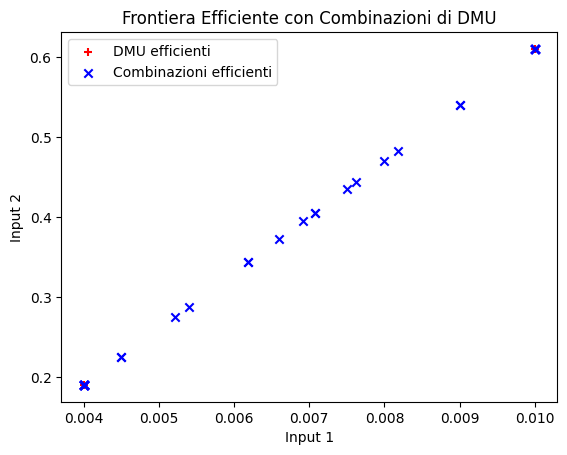

In [ ]:
# Crea una lista dei punti per i DMU efficienti (dal dataframe originale)
eff_dmu_inputs = df[["i_deviazionestandard", "i_beta"]].iloc[[i for i, r in enumerate(dea.result) if r.is_efficient]].to_numpy()
eff_dmu_outputs = df[["o_rendimentoatteso"]].iloc[[i for i, r in enumerate(dea.result) if r.is_efficient]].to_numpy()

# Aggiungi i punti delle combinazioni ponderate (dal dataframe df_dmu_efficienti)
comb_eff_inputs = df_dmu_efficienti[["input 1 ponderato", "input 2 ponderato"]].to_numpy()
comb_eff_outputs = df_dmu_efficienti["output ponderato"].to_numpy()

# Visualizza i DMU efficienti (in rosso) e le nuove combinazioni di DMU efficienti (in blu)
plt.figure()
plt.scatter(eff_dmu_inputs[:, 0], eff_dmu_inputs[:, 1], color="red", label="DMU efficienti", marker="+")
plt.scatter(comb_eff_inputs[:, 0], comb_eff_inputs[:, 1], color="blue", label="Combinazioni efficienti", marker="x")

# Unisci le combinazioni efficienti con una linea
#plt.plot(comb_eff_inputs[:, 0], comb_eff_inputs[:, 1], color="blue", linestyle='-', marker='x')  # Linea tra le combinazioni
# VANNO ORDINATI PER RANKING PRIMA DI ESSERE UNITI CON LA LINEA

# Aggiungi etichette per migliorare la leggibilità
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Frontiera Efficiente con Combinazioni di DMU")
plt.legend()

plt.show()